# Visualization of $\mathfrak{sl}_2$



## Some facts

#### The (P, Q, L) basis

The matrices:

$$
P = {1 \over 2}\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},
Q = {1 \over 2}\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, 
L = {1 \over 2}\begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
$$

Form a basis of the lie-algebra.

They verify the following relations:

$$
[P, Q] = L,
[L, Q] = P,
[L, P] = -Q
$$

#### The Killing form
The __killing form__ in the (P, Q, L) basis is given by:
$ \begin{pmatrix} 2 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & -2 \end{pmatrix} $

As can be checked on a basis, the killing form is also given by:

$$k(X, Y) = 4 \mathrm{tr}(XY)$$

#### Determinant and Killing form

Let $X \in \mathfrak{sl}_2$, then $k(X, X) = -8\det(X)$

To simplify the notation, we will write $k(X) \equiv k(X, X)$

#### Orbits of the adjoint action

The adjoint action of SL(2) on its lie algebra splits $\mathfrak{sl}_2$ into the following orbits:

* {0} the 0 matrix
* Each sheet of 2 sheets hyperboloid of the form K(X)= -c, where $c \in \mathbb{R}_+^*$
    This matrices are infinitesimal rotations of a given angle.
    The angle is constant for each sheet, and each constant c.
* Each part of the cone $\mathrm{Nil} = \{ K(X)=0 | X \in \mathfrak{sl}_2, X \neq 0 \}$
    This corresponds to nilpotent matrices.
    They are mapped to shear mappings by $\exp$.
    This cone is not connected because it lacks 0, each split is a different orbit.
* A hyperboloid of revolution, given by K(X) = c, $c \in \mathbb{R}_+^*$
    This matrices are mapped to squeeze mappings or lorentzian boosts.
    Each hyperboloid contains a single eigenvalue for the squeeze mapping.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

plt.style.use("dark_background")

## First we define some utils

In [30]:
P, Q, L = 1/2*np.matrix([[0, 1], [1, 0]]), 1/2*np.matrix([[1, 0], [0, -1]]), 1/2*np.matrix([[0, -1], [1, 0]])
Kill = 2*np.diag([1, 1, -1])
def killing(X, Y=None):
    """ Killing form.
    
    Args:
        X (np.matrix): Lie algebra vector.
        Y (np.matrix): Lie algebra vector, if None assumes Y=X.
        
    Returns:
        Scalar.
    """
    if Y is None:
        Y = X
    return 4*np.trace(X*Y)

def random_lie_vector():
    """ Creates a random vector in sl2.
    
    Returns:
        np.matrix 2x2 traceless
    """
    a, b, c = np.random.normal(size=3)
    return a*P + b*Q + c*L

## Cut overview of $\mathfrak{sl}_2$

Taking advantage that the killing form is __invariant by rotations around the L axis__ (in the PQL basis), we can visualize a single plane $\mathcal{P}$ of the form Q=0 and then rotate it around the L axis to visualize the whole space.

Let $X \in \mathcal{P}$, we have $X = xP + yL$
Then we have $K(X) = 2(x^2 - y^2)$

We will plot the contour line of K(X) in $\mathcal{P}$

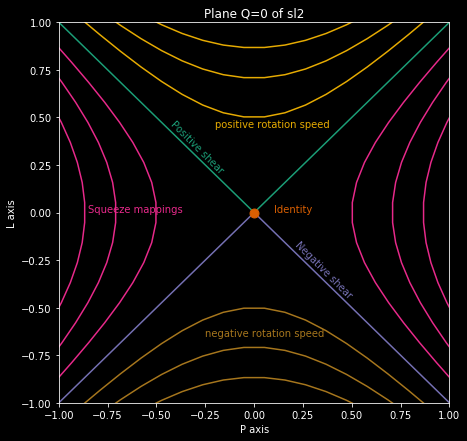

In [4]:
import matplotlib
colormap = matplotlib.cm.Dark2.colors
plt.figure(figsize=(7, 7))
max_coord = 1.5 # maximum coordinate for the linspace
# shear mappings
nil_neg_1_x = np.linspace(-1, 0, 20)
nil_neg_1_y = -nil_neg_1_x
nil_neg_2_x = np.linspace(0, 1, 20)
nil_neg_2_y = nil_neg_2_x
nil_pos_1_x = np.linspace(-1, 0, 20)
nil_pos_1_y = nil_pos_1_x
nil_pos_2_x = np.linspace(0, 1, 20)
nil_pos_2_y = -nil_pos_2_x
plt.plot(nil_neg_1_x, nil_neg_1_y, color=colormap[0])
plt.plot(nil_neg_2_x, nil_neg_2_y, color=colormap[0])
plt.plot(nil_pos_1_x, nil_pos_1_y, color=colormap[2])
plt.plot(nil_pos_2_x, nil_pos_2_y, color=colormap[2])
plt.text(-0.44, 0.21, "Positive shear", color=colormap[0], rotation=-45)
plt.text(0.2, -0.45, "Negative shear", color=colormap[2], rotation=-45)
# squeeze mappings
for c in [0.25, 0.5, 0.75]:
    squeeze_y = np.linspace(-1, 1, 20)
    squeeze_x_1 = np.sqrt(c+squeeze_y**2)
    squeeze_x_2 = -np.sqrt(c+squeeze_y**2)
    plt.plot(squeeze_x_1, squeeze_y, color=colormap[3])
    plt.plot(squeeze_x_2, squeeze_y, color=colormap[3])
plt.text(-0.85, 0, "Squeeze mappings", color=colormap[3])
# rotations
for c in [0.25, 0.5, 0.75]:
    rot_x = np.linspace(-1, 1, 20)
    rot_y_1 = np.sqrt(c+rot_x**2)
    rot_y_2 = -np.sqrt(c+rot_x**2)
    plt.plot(rot_x, rot_y_1, color=colormap[5])
    plt.plot(rot_x, rot_y_2, color=colormap[6])
plt.text(-0.2, 0.45, "positive rotation speed", color=colormap[5])
plt.text(-0.25, -0.65, "negative rotation speed", color=colormap[6])
plt.scatter(0, 0, s=80, color=colormap[1], zorder=10)
plt.text(0.1, 0, "Identity", color=colormap[1])
plt.title("Plane Q=0 of sl2")
plt.xlabel("P axis")
plt.ylabel("L axis")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
None

- __squeeze mappings__ => lines
- __rotations__ => circles
- __shears__ => horocycles

In [31]:
def d3_rep(g):
    """ A three dimensional representation of SL(2).
    
    Args:
        g (np.matrix): Element of SL(2).
        
    Returns:
        3x3 matrix.
    """
    a, b, c, d = g[0,0], g[0, 1], g[1, 0], g[1, 1]
    return np.matrix([
        [(a**2-b**2-c**2+d**2)/2, c*d-a*b, (-a**2-b**2+c**2+d**2)/2],
        [b*d-a*c, a*d+b*c, a*c+b*d],
        [(-a**2+b**2-c**2+d**2)/2, a*b+c*d, (a**2+b**2+c**2+d**2)/2]
    ])
start_point = np.array([[0], [0], [1]])
t = np.linspace(-1, 1, 40)
n_points = len(t)
#  for the squeeze mappings
matrix_path = np.stack([np.array(P)]*n_points)*t.reshape(n_points, 1, 1)
squeeze_path = []
for this_matrix in matrix_path:
    squeeze_path.append(d3_rep(expm(this_matrix))*start_point)
# convert the points to numpy
squeeze_path = np.array(squeeze_path).reshape(-1, 3)

# for the shear mappings 
matrix_path = np.stack([np.array(P+L)]*n_points)*t.reshape(n_points, 1, 1)
shear_path = []
for this_matrix in matrix_path:
    shear_path.append(d3_rep(expm(this_matrix))*start_point)
# convert the points to numpy
shear_path = np.array(shear_path).reshape(-1, 3)

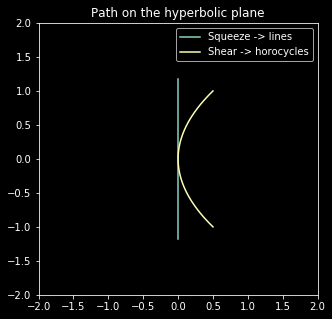

In [33]:
plt.figure(figsize=(5, 5))
plt.plot(squeeze_path[:, 0], squeeze_path[:, 1], label="Squeeze -> lines")
plt.plot(shear_path[:, 0], shear_path[:, 1], label="Shear -> horocycles")
plt.legend()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Path on the hyperbolic plane")
None

## Check that the lie algebra basis is "well balanced"

- the operation represented by $\exp({\pi \over 2}L)$ is a quarter turn.
- this operation maps Dx to Dy

In [34]:
# we want this matrix to act as a 90 degrees rotation
r_90 = np.matrix(expm(np.pi/2*L))
r_90_rep = d3_rep(r_90)

# here we test that the order of r_90_rep divides 4
np.testing.assert_almost_equal(r_90_rep**4, np.identity(3))
# here we test that the ordred of r_90_rep is not 2
np.testing.assert_almost_equal(
    r_90_rep**2, 
    np.matrix([[-1, 0, 0], [0, -1, 0], [0, 0, 1]]))

#***#...#...#...#***#...#...#...#***#...#...#...#***#...#...#...#***#...#...#...
# at this point we know that r_90_rep has order 4
# we still need to check that the action works well on Dx and Dy

# check that r_90 . Dx = Dy (where the action is given by the conjugation)
np.testing.assert_almost_equal(
    r_90*Q*np.linalg.inv(r_90),
    P)
# this in itself proves that r_90 has order 4
np.testing.assert_almost_equal(
    (r_90**2)*Q*np.linalg.inv(r_90**2),
    -Q)

## Computations

### Computation of the killing form

A note on the computations: the basis used here is 2 times the basis given in the introduction. More precisely:

$$
P = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},
Q = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, 
L = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
$$


$k(X, Y) = \mathrm{tr}(\mathrm{ad}_X \circ \mathrm{ad}_Y)$

- **k(L, L) = -8**

    $\mathrm{ad}_L \circ \mathrm{ad}_L(X) = [L, [L, X]]$
    
    Which gives:
    $$\mathrm{ad}_L \circ \mathrm{ad}_L(Q) = [L, [L, Q]] = -4Q\\
    \mathrm{ad}_L \circ \mathrm{ad}_L(P) = [L, [L, P]] = -4P \\
    \mathrm{ad}_L \circ \mathrm{ad}_L(L) = 0 
    $$
    
- **k(Q, Q) = 8**

    $\mathrm{ad}_Q \circ \mathrm{ad}_Q(X) = [Q, [Q, X]]$
    
    Which gives:
    $$\mathrm{ad}_Q \circ \mathrm{ad}_Q(Q) = 0\\
    \mathrm{ad}_Q \circ \mathrm{ad}_Q(P) = [Q, -2L] = 4P\\
    \mathrm{ad}_Q \circ \mathrm{ad}_Q(L) = 4L
    $$
    
- **k(P, P) = 8**

    $\mathrm{ad}_P \circ \mathrm{ad}_P(X) = [P, [P, X]]$
    
    Which gives:
    $$\mathrm{ad}_P \circ \mathrm{ad}_P(Q) = 4Q \\
    \mathrm{ad}_P \circ \mathrm{ad}_P(P) = 0\\
    \mathrm{ad}_P \circ \mathrm{ad}_P(L) = 4L
    $$
    
- **k(Q, P) = 0**

    $\mathrm{ad}_Q \circ \mathrm{ad}_P(X) = [Q, [P, X]]$
    
    Which gives:
    $$\mathrm{ad}_Q \circ \mathrm{ad}_P(Q) = -2P\\
    \mathrm{ad}_Q \circ \mathrm{ad}_P(P) = 0\\
    \mathrm{ad}_Q \circ \mathrm{ad}_P(L) = 0
    $$
 
 - **k(L, Q) = 0**

    $\mathrm{ad}_L \circ \mathrm{ad}_Q(X) = [L, [Q, X]]$
    
    Which gives:
    $$\mathrm{ad}_L \circ \mathrm{ad}_Q(Q) = 0\\
    \mathrm{ad}_L \circ \mathrm{ad}_Q(P) = 0 \\
    \mathrm{ad}_L \circ \mathrm{ad}_Q(L) =  4Q
    $$

    